In [ ]:
import pandas as pd


In [ ]:
df_orig = pd.read_csv("/content/311_lep_2.csv")
df = pd.read_csv("/content/311_lep_2.csv")

In [ ]:
df.shape

(131797, 33)

In [ ]:
df['REASON'].nunique()

28

In [ ]:
df.iloc[0,:]

Unnamed: 0                                                         0
CASE_ENQUIRY_ID                                       101003000000.0
OPEN_DT                                                       1/1/20
SUBJECT                                      Mayor's 24 Hour Hotline
REASON                                             Abandoned Bicycle
TYPE                                               Abandoned Bicycle
LOCATION                            70 Burbank St, Boston, MA  02115
propid                                                       A162736
SOURCE                                                Mobile Request
X                                                          -71.08892
Y                                                           42.34429
LocationID                                               401476000.0
ObjectID                                                         NaN
TLID                                                     639001902.0
BLK_ID_10                         

In [ ]:
df['RATIO_LEP_AND_POP100_RE'] = df['LEP']/df['POP100_RE']
df_closed = df[~df['CLOSED_DT'].isnull()]
df_open = df[df['CLOSED_DT'].isnull()]

In [ ]:
print(df_closed.shape)
print(df_open.shape)

df_closed.to_csv("/content/big_311_closed.csv")
df_open.to_csv("/content/big_311_open.csv")

(120318, 34)
(11479, 34)


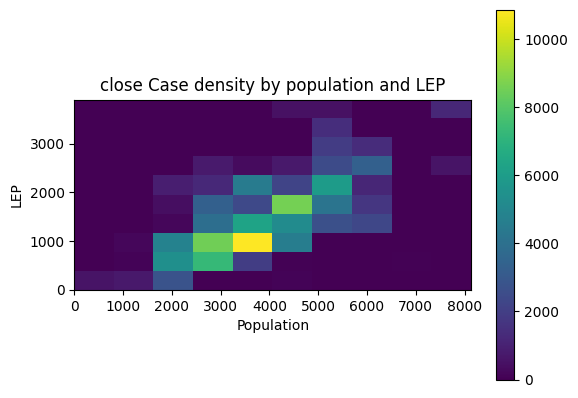

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

heatmap, xedges, yedges = np.histogram2d(df_closed['POP100_RE'], df_closed['LEP'], bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('Population')
plt.ylabel('LEP')
plt.title('close Case density by population and LEP')
plt.show()




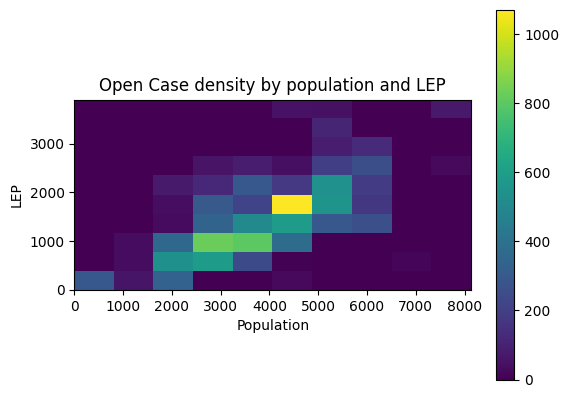

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

heatmap, xedges, yedges = np.histogram2d(df_open['POP100_RE'], df_open['LEP'], bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('Population')
plt.ylabel('LEP')
plt.title('Open Case density by population and LEP')
plt.show()


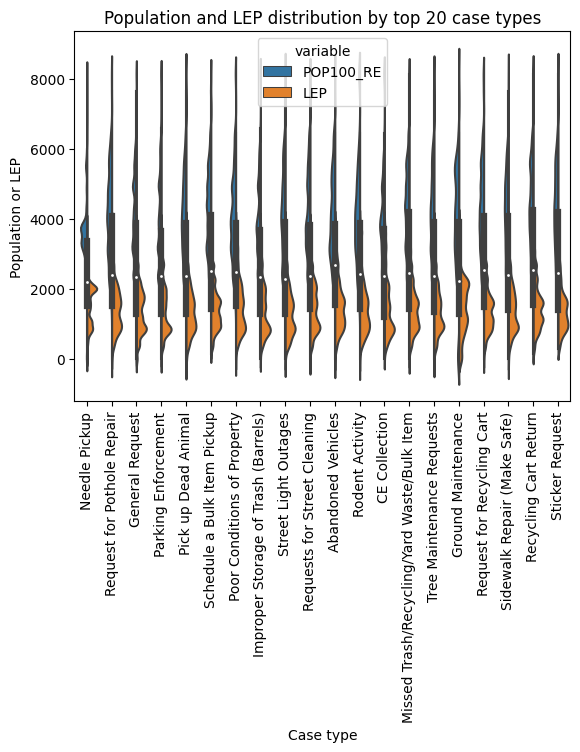

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


top_cases = df['TYPE'].value_counts().head(20).index.tolist()
df_top_cases = df[df['TYPE'].isin(top_cases)]

fig, ax = plt.subplots()
df_melt = pd.melt(df_top_cases, id_vars=['TYPE'], value_vars=['POP100_RE', 'LEP'])
sns.violinplot(x='TYPE', y='value', hue='variable', data=df_melt, split=True, ax=ax)
plt.xlabel('Case type')
plt.xticks(rotation=90)
plt.ylabel('Population or LEP')
plt.title('Population and LEP distribution by top 20 case types')
plt.show()


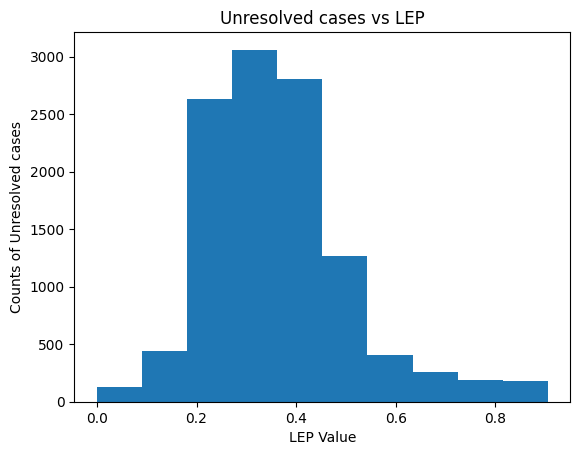

In [ ]:
plt.hist(df_open['RATIO_LEP_AND_POP100_RE'], bins=20)
plt.xlabel('LEP Value')
plt.ylabel('Counts of Unresolved cases')
plt.title('Unresolved cases vs LEP')
plt.show()